## **Importing Libraries**

In [ ]:
import pandas as pd # for manipulating dataframes
import numpy as np # for math operations later
import matplotlib.pyplot as plt # for graphics
import seaborn as sns # for graphics
import warnings

sns.set(color_codes=True)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
%matplotlib inline

## 1- **Load data and Interpret Columns**

In [ ]:
df = pd.read_csv("Group11-weatherAUS.csv")
print('Size of weather data frame is :', df.shape)
df.head() # Printing the first 5 rows of data

Size of weather data frame is : (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The dataset is loaded lets look at the information of the data to know more about its columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

We can see that we have attributes on location, temperature, intensity of rainfall, evaporation, sunshine, information about wind direction and speed at different times of a day. We also have 2 daily observations of humidity, pressure, cloud and temperature. Then we have have column stating the past information RainToday and some future information RainTomorrow. 

We see that some of these columns are float and some are categorical objects. Also we see that number of instances in each of these columns is not same so it is sure that the dataset have missing values and needs to be cleaned. We ll do that in next section.

We can know more about the columns by looking at their statistical information as follows:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


The above description only take in consideration the numerical features from the data. We can observe their number of observations, min and max values along with mean and standard deviation informations



Now that we have some information about the attributes, its time to clean/pre-process the dataset

## 2- **Carry out any cleaning if needed**

> ### Labelling

We need to convert Yes/No into 1/0 as machine can only undersatnd numbers

In [ ]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

> ### Missing Data

> From df.info() we know that there difference in total number of observations in each column so some data is obviously missing lets find top columns with most missing data.

In [ ]:
# Checking missing values

df.isna().sum() 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

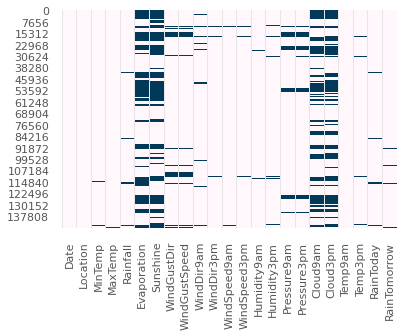

In [ ]:
# Missing Data Pattern Visually (As it is a Data Science Project) 
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

> From the above figure we can see that 4 columns, Evaporation, Sunshine, Cloud9am and Cloud3pm have most missing data. Let find the percentage of missing data in these columns

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4) # Remove 4 to see all missing percentages in columns

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216


> From above output we can see that they have almost half of missing data in them so we need to drop these columns fully 

In [ ]:
df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1, inplace=True)

Now that we have dropped the collumns with most missing values we can drop the rows having missing values 

In [ ]:
df.dropna(axis=0, inplace=True) # Dropping rows

In [ ]:
# Checking again for missing values, we should not get any

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Now we can see we do not have any missing values in any of the columns and we can say that the dataset is cleaned right now. Lets export this dataset, so in future we can use it directly

In [ ]:
# Exporting the pre-processed data as new csv without index column

df.to_csv('Group11-weatherAUS-cleaned.csv', index=False)

## **Frame questions based on data and *try* to answer them visually**

> **Question:** Find the data range of obervations

>From the dataset description we can not see the min and max value of date because its datatype is object (refer to df.info()). So we need to find it explicitly as follows:

In [ ]:
print('min', df['Date'].min())
print('max', df['Date'].max())

min 1/1/2008
max 9/9/2016


> Now we know that data points are recorded till 2016 and they goes back till 2008

> **Question:** It is very important to know the class distribution of target class. Find it.

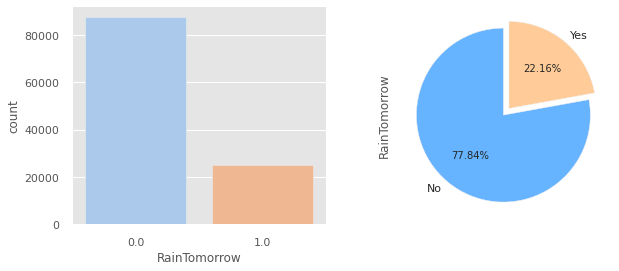

In [ ]:
# The Class Distribution

fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(10,4))
labels=['No', 'Yes']
sns.countplot(x=df.RainTomorrow, data=df, palette="pastel",ax=ax[0])
df['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66b3ff','#ffcc99'], 
                                             labels=labels, explode = (0, 0.1), startangle=90)
plt.show()

> From the above results we can see that the data is imbalanced. We only have 22.16% of samples supporting True case of RainTomorrow

> **Question:** Find the distribution of datapoints in each column (uni-variate analysis)

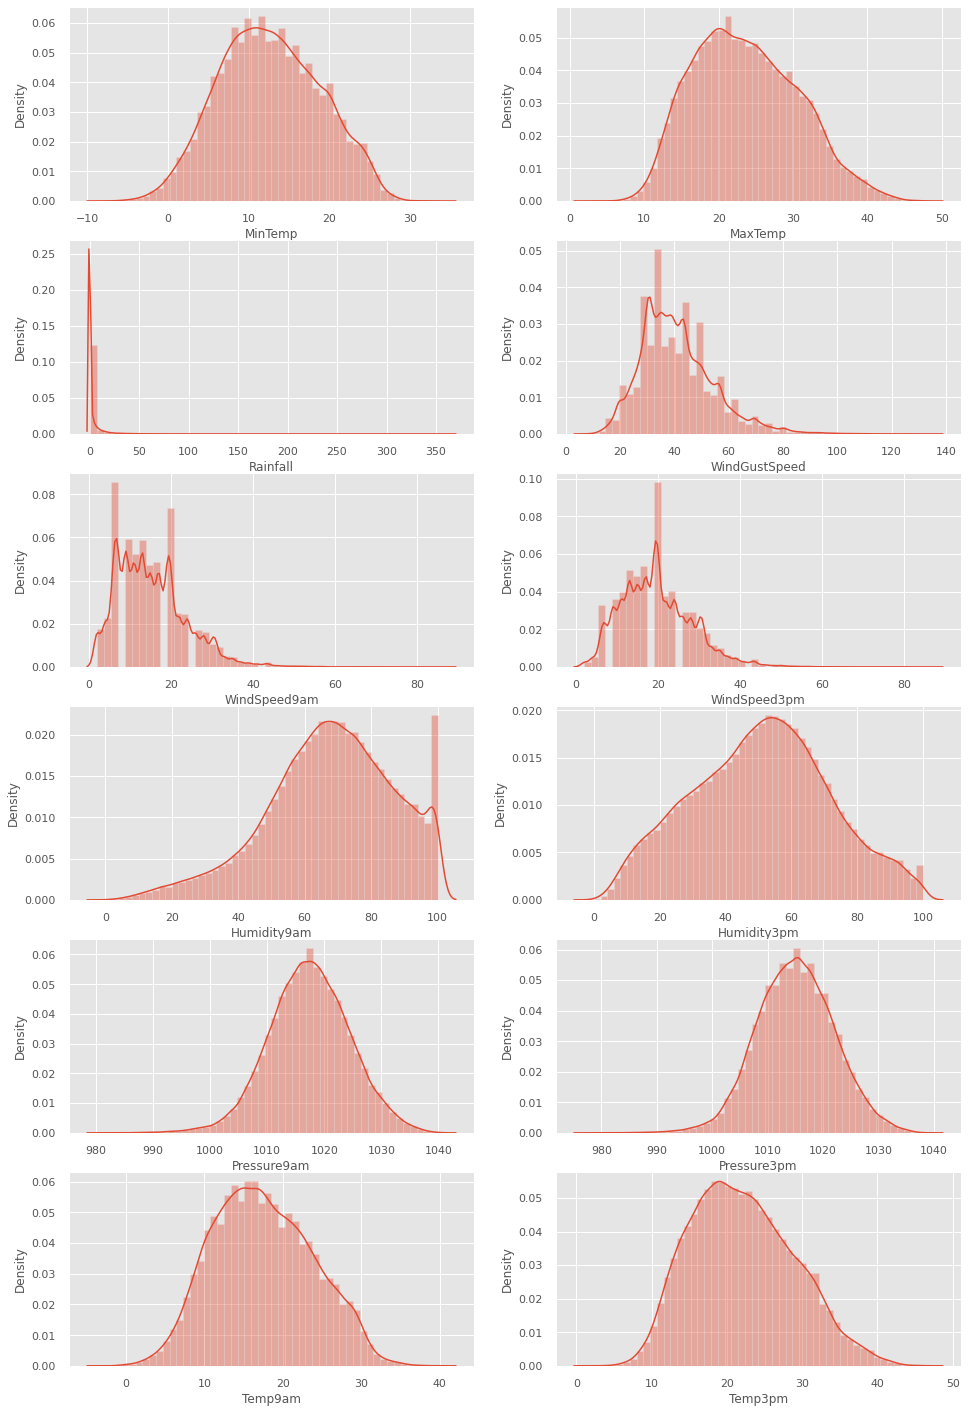

In [ ]:
# Making a subplot of 6 by 2 and ploting all 12 numeric features in a seperate box

fig, ax2 = plt.subplots(6, 2, figsize=(16, 25))
sns.distplot(df['MinTemp'],ax=ax2[0][0])
sns.distplot(df['MaxTemp'],ax=ax2[0][1])
sns.distplot(df['Rainfall'],ax=ax2[1][0])
sns.distplot(df['WindGustSpeed'],ax=ax2[1][1])
sns.distplot(df['WindSpeed9am'],ax=ax2[2][0])
sns.distplot(df['WindSpeed3pm'],ax=ax2[2][1])
sns.distplot(df['Humidity9am'],ax=ax2[3][0])
sns.distplot(df['Humidity3pm'],ax=ax2[3][1])
sns.distplot(df['Pressure9am'],ax=ax2[4][0])
sns.distplot(df['Pressure3pm'],ax=ax2[4][1])
sns.distplot(df['Temp9am'],ax=ax2[5][0])
sns.distplot(df['Temp3pm'],ax=ax2[5][1])

> From above plot we see that data points in most of the columns are following normal distribution while columns, Rainfall, WindGustSpeed, WindSpeed9am and WindSpeed3pm are somewhat skewed on the left side

> **Question:** It is known that humidy and wind speed effect the rain greatly. Find their relation with the RainTomorrow Column

> **Question:** We know that Rain happens when only there is low and cool temperatures. Proove this hypothesis

> **Question:** What is the relation of Temperature vs Pressure on the occurance of RainTommorow?

> All of these questions can be answered once we have the pairplot for the data as this requires Bi-variate analysis so we need to plot each column vs other on the hue of RainTomowwo as follows:

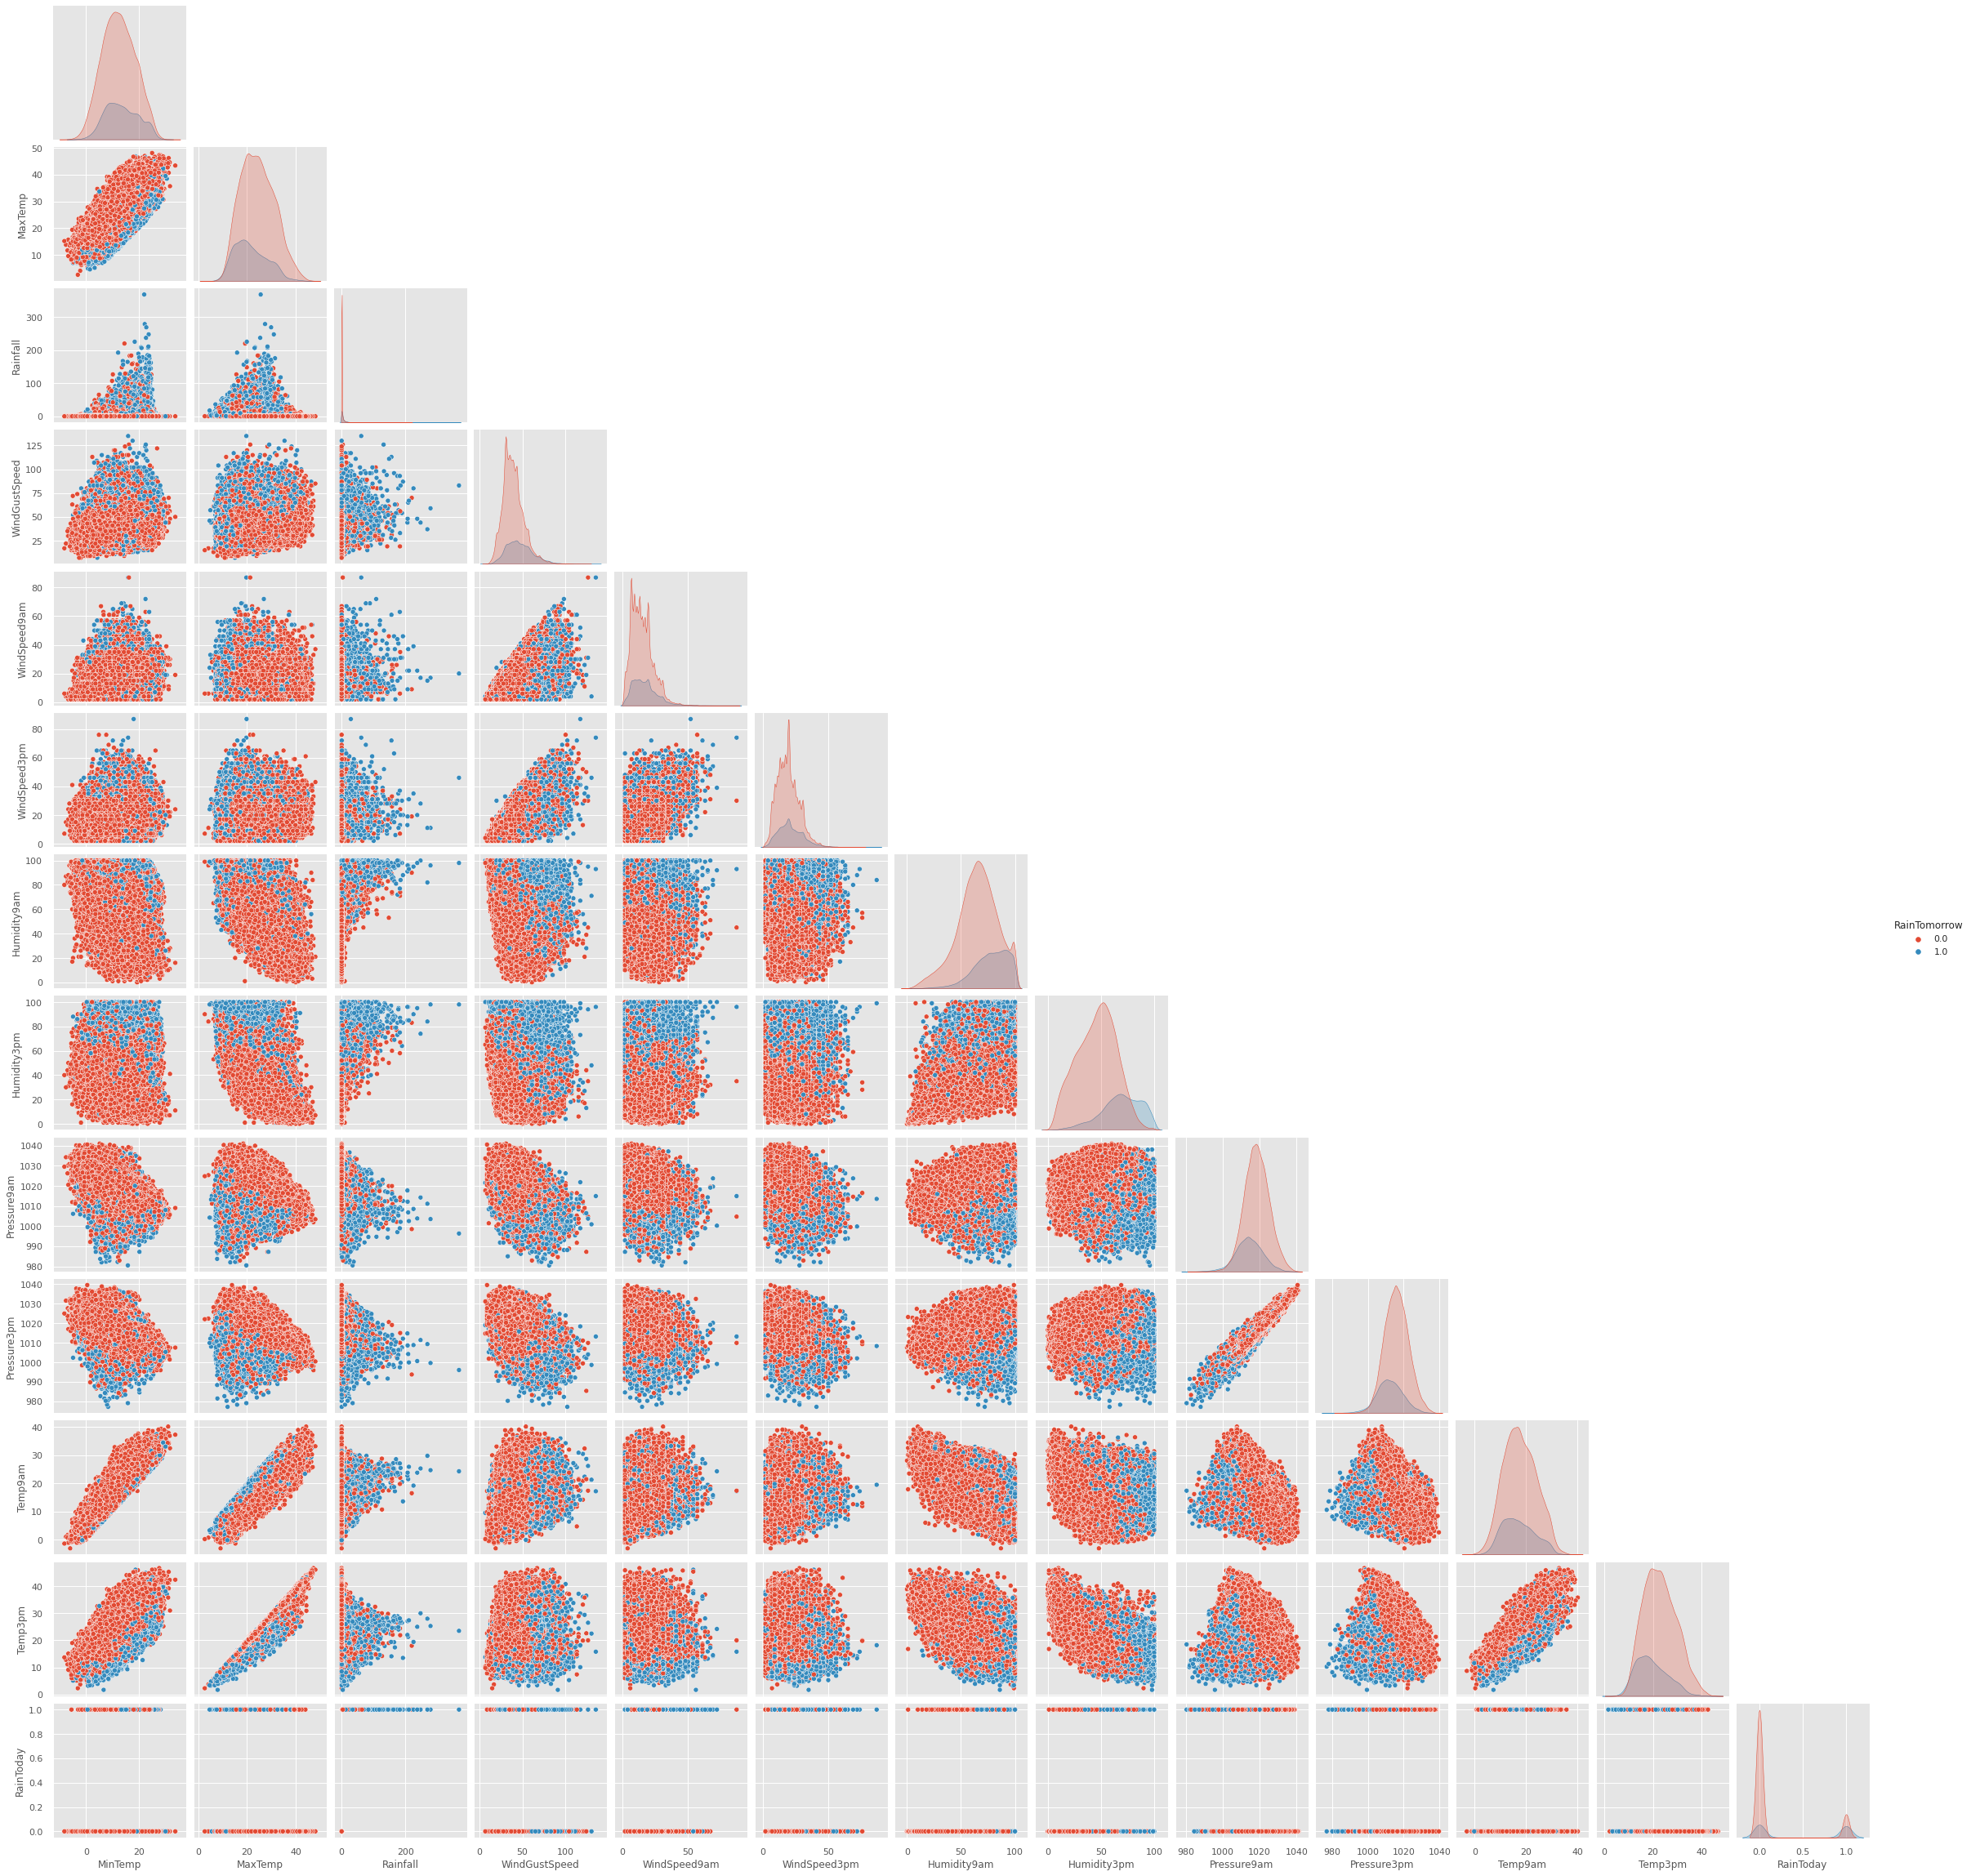

In [ ]:
sns.pairplot(df, hue='RainTomorrow', corner=True)

> **Answer:** From the above pair plot, if we see the Humidity9am Vs WindGust Speed we ll see that they both have linear relation with RainTomorrow, We see a nice cluster of blues (RainTomorrow True) on the top right side of this plot which indicates that as humity increases, if we have a great wind speed there is more likely to have RainTomorrow.

> **Answer:** Lets look at the Temp3pm Vs MaxTemp plot we see a linear relation between these two columns but this time the inverse relation of both of them with the hue of plot (RainTomorrow). We see a blue cluster on bottom left of their plot which clearly indicates that RainTomorrow only happends when there is low Temp3pm and low MaxTemp, which proves the hypothesis that RainTomorrow only happens on low temperatures and cool breezes

> **Answer:** Having a look at Temp3pm and Pressure3pm plot we see that once again they both have inverse realtion with the RainTomorrow variable. The big blue cluster on bottom left proves that RainTomorrow only happens on low pressures and low temperatures

> **Questions:** There can be so many realtions in these columns. Find the correlation between columns

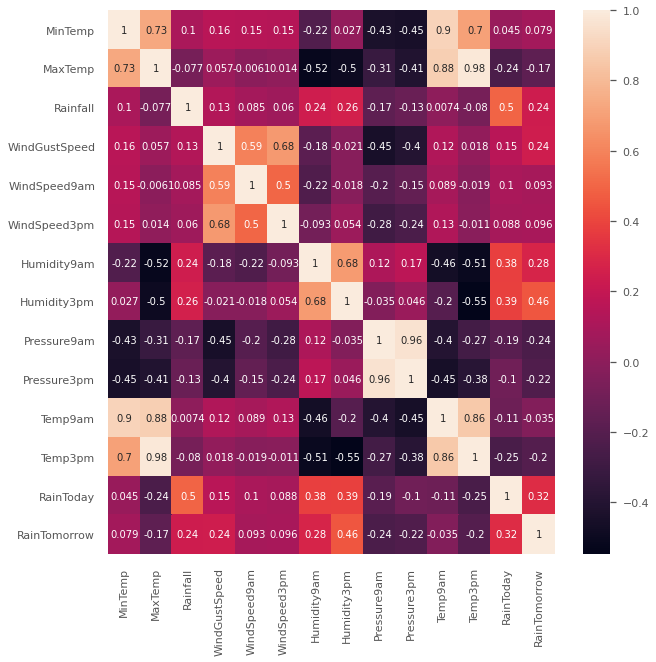

In [147]:
cor = df.corr() # Calculating correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True) # Plotting correlation matrix in a heatmap

> From the figure we can see all the columns with ligther cells are very much correlated and low correlated columns have darker cells